In [15]:
import pandas as pd
import numpy as np
import math
import json
%matplotlib inline

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
portfolio=portfolio.join(portfolio['channels'].str.join('|').str.get_dummies().add_prefix('channel_'))

In [5]:
portfolio=portfolio.drop('channels',axis=1)

In [6]:
portfolio

,reward,difficulty,duration,offer_type,id,channel_email,channel_mobile,channel_social,channel_web
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1
2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,0,1
3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1
4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1
5,3,7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1
6,2,10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1
7,0,0,3,informational,5a8bc65990b245e5a138643cd4eb9837,1,1,1,0
8,5,5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1
9,2,10,7,discount,2906b810c7d4411798c6938adc9daaa5,1,1,0,1


In [7]:
profile.sample(5)

,gender,age,id,became_member_on,income
7566,M,20,3ff318b1f700424897bb15fd18c8ebff,20171101,53000.0
673,F,81,648bf85977494f6592d776c42896c3bf,20170804,101000.0
8271,None,118,9c74d4f8a51346d284244ea2e01a7f14,20170627,NaN
15720,None,118,7713b9dfc90f4570a6eab57cf64191b9,20160219,NaN
6253,None,118,4a642bb858f94c869d1d7ed89ff4b152,20180326,NaN


In [8]:
#Age Visualization
count_by_agegroup=profile.groupby(pd.cut(profile['age'], np.arange(0, 118+5, 5)))['id'].count()

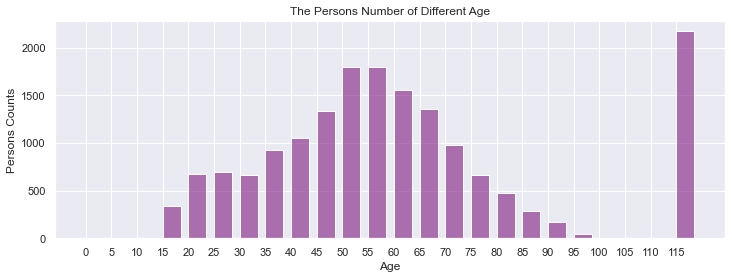

In [9]:
sns.set()
plt.figure(figsize=(12,4))
plt.bar(np.arange(0, 118, 5),count_by_agegroup,width=3.5, align='edge', color = (0.5, 0.1, 0.5, 0.6 ))
plt.xticks(np.arange(0, 118, 5))
plt.xlabel('Age')
plt.ylabel('Persons Counts')
plt.title('The Persons Number of Different Age')
plt.show()

In [10]:
count_by_incomegroup=profile.groupby(pd.cut(profile['income'], np.arange(20000, 120000+10000, 10000)))['id'].count()

<AxesSubplot:ylabel='id'>

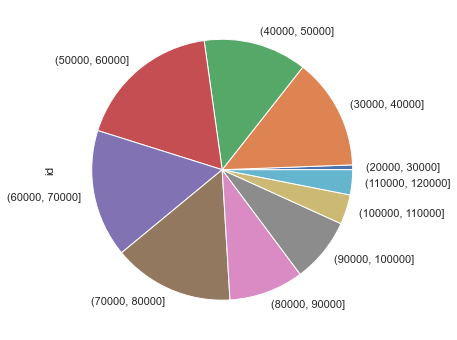

In [11]:
count_by_incomegroup.plot.pie(figsize=(6, 6))

Text(0.5, 1.0, 'The Persons Number of Different Income')

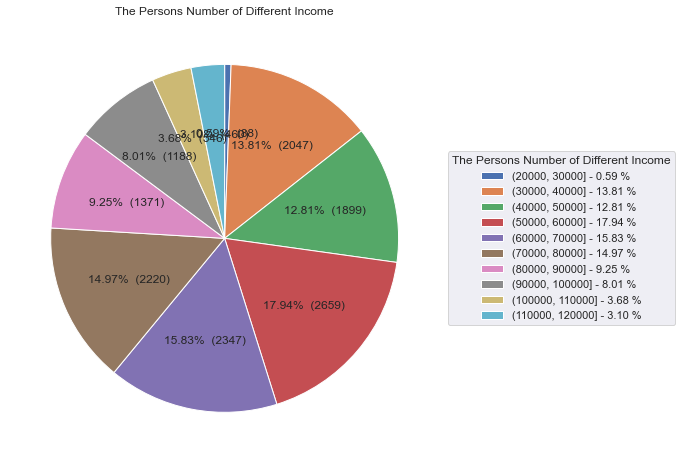

In [13]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))

labels=['(20000, 30000]','(30000, 40000]','(40000, 50000]','(50000, 60000]','(60000, 70000]',\
       '(70000, 80000]','(80000, 90000]','(90000, 100000]','(100000, 110000]','(110000, 120000]']

porcent = 100.*count_by_incomegroup/count_by_incomegroup.sum()

patches, texts, autotexts = ax.pie(count_by_incomegroup, autopct=make_autopct(count_by_incomegroup),startangle=90,counterclock=False)

labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(labels, porcent)]

'''
sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, count_by_incomegroup),
                                          key=lambda x: x[2],
                                          reverse=True))
'''
ax.legend(patches, labels,
          title='The Persons Number of Different Income',
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('The Persons Number of Different Income')
#plt.legend(patches, labels, loc="lower right", bbox_transform=plt.gcf().transFigure)
#plt.subplots_adjust(left=0.0, bottom=0.1, right=0.45)

In [16]:
transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [17]:
transcript[transcript.event=='offer received'].head(5)

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [18]:
transcript[transcript.event=='offer viewed'].head(5)

,person,event,value,time
12650,389bc3fa690240e798340f5a15918d5c,offer viewed,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},0
12651,d1ede868e29245ea91818a903fec04c6,offer viewed,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},0
12652,102e9454054946fda62242d2e176fdce,offer viewed,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
12653,02c083884c7d45b39cc68e1314fec56c,offer viewed,{'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'},0
12655,be8a5d1981a2458d90b255ddc7e0d174,offer viewed,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},0


In [19]:
#Those purchased and have received an offer
transcript[transcript.event=='offer completed'].head(5)

,person,event,value,time
12658,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,offer completed,{'offer_id': '2906b810c7d4411798c6938adc9daaa5...,0
12672,fe97aa22dd3e48c8b143116a8403dd52,offer completed,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,0
12679,629fc02d56414d91bca360decdfa9288,offer completed,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...,0
12692,676506bad68e4161b9bbaffeb039626b,offer completed,{'offer_id': 'ae264e3637204a6fb9bb56bc8210ddfd...,0
12697,8f7dd3b2afe14c078eb4f6e6fe4ba97d,offer completed,{'offer_id': '4d5c57ea9a6940dd891ad53e9dbe8da0...,0


In [20]:
transcript[transcript.event=='offer completed'].iloc[0].value

{'offer_id': '2906b810c7d4411798c6938adc9daaa5', 'reward': 2}

In [21]:
#Those purchased without an offer
transcript[transcript.event=='transaction'].head(5)

,person,event,value,time
12654,02c083884c7d45b39cc68e1314fec56c,transaction,{'amount': 0.8300000000000001},0
12657,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,transaction,{'amount': 34.56},0
12659,54890f68699049c2a04d415abc25e717,transaction,{'amount': 13.23},0
12670,b2f1cd155b864803ad8334cdf13c4bd2,transaction,{'amount': 19.51},0
12671,fe97aa22dd3e48c8b143116a8403dd52,transaction,{'amount': 18.97},0


In [22]:
#convert dict into dummy
transcript=pd.concat([transcript.drop(['value'], axis=1), transcript['value'].apply(pd.Series)], axis=1)

In [23]:
transcript.head()

,person,event,time,offer id,amount,offer_id,reward
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN,NaN
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN,NaN
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,NaN,NaN,NaN
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4,NaN,NaN,NaN
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,NaN,NaN


In [28]:
transcript['consolidate_offer_id']=0
df_1=transcript[transcript.event=='offer received']
df_2=transcript[transcript.event=='offer viewed']
df_3=transcript[transcript.event=='offer completed']
df_4=transcript[transcript.event=='transaction']
df_1.loc['consolidate_offer_id']=df_1['offer id']
df_2.loc['consolidate_offer_id']=df_2['offer id']
df_3.loc['consolidate_offer_id']=df_3['offer_id']
df_4.loc['consolidate_offer_id']=df_4['offer_id']
transcript_new=pd.concat([df_1,df_2,df_3,df_4],axis=0)

In [29]:
transcript_new.to_csv('data/transcript_new_2.csv')

In [30]:
from tqdm import trange

In [31]:
transcript_new=pd.read_csv('data/transcript_new_2.csv')

C:\Users\Rahul\Miniconda3\envs\ml\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (0,4,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [32]:
del transcript_new['Unnamed: 0']

In [33]:
del transcript_new['offer id']

In [34]:
del transcript_new['offer_id']

In [35]:
transcript_new.sample(5)

,person,event,time,amount,reward,consolidate_offer_id
80582,07a00827302441ee968555e2fd20dbcd,offer viewed,12.0,NaN,NaN,0.0
194429,86e9d338b85b4177b369fe6b0ad4fed3,transaction,168.0,1.86,NaN,0.0
156238,79a1b2e7bab8420c98a59530a783155d,offer completed,522.0,NaN,5.0,0.0
36580,dd2a12c798a54a1687b5ccb12a8e508e,offer received,336.0,NaN,NaN,0.0
138787,93ad37ec69c8432cb320146df7fe6c9f,offer completed,168.0,NaN,3.0,0.0


In [36]:
#Visualizing those completed the offer
amount=transcript_new[transcript_new.event=='offer completed']['amount']

In [37]:
amount.isnull().mean()

1.0

In [39]:
offer_completed=transcript_new[transcript_new.event=='offer completed']

In [40]:
transaction=transcript_new[transcript_new.event=='transaction']

In [41]:
transaction['time']=transaction['time']/24

C:\Users\Rahul\AppData\Local\Temp/ipykernel_19256/1176080265.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction['time']=transaction['time']/24


In [42]:
transaction.rename(columns={'time':'transaction_time'}, inplace=True)

C:\Users\Rahul\Miniconda3\envs\ml\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [43]:
portfolio.rename(columns={'id':'consolidate_offer_id'}, inplace=True)

In [56]:
#map transcript with portfolio to see details of the offer
person_and_offer=transcript_new.set_index('consolidate_offer_id').merge(portfolio.set_index('consolidate_offer_id'))

In [58]:
del person_and_offer['reward_x']

KeyError: 'reward_x'

In [59]:
person_and_offer.rename(columns={'reward_y':'reward'}, inplace=True)

In [60]:
person_and_offer.columns

Index(['person', 'event', 'time', 'amount', 'reward', 'channels', 'difficulty',
       'duration', 'offer_type'],
      dtype='object')

In [61]:
person_and_offer=person_and_offer[['event', 'person', 'consolidate_offer_id','offer_type','difficulty','amount','reward',\
                                   'duration', 'time','channel_email',\
                                       'channel_mobile', 'channel_social', 'channel_web']]

KeyError: "['consolidate_offer_id', 'channel_email', 'channel_mobile', 'channel_social', 'channel_web'] not in index"

In [62]:
#Import all useful packages
import datetime
#from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,f1_score

In [63]:
profile['became_member_on'] = profile.became_member_on.apply(lambda x: datetime.datetime.strptime(str(x),'%Y%m%d').date())

In [64]:
def transform_and_tts(profile,offer):
    
    '''
    This function takes in profile and offer dataframes and returns training and test datasets for ML.
    
    inputs: 
        1. profile - profile dataframe
        2. offer - offer dataframe
    
    outputs:
        1. X_train, X_test, y_train, y_test - input data for training and test, target label for training and test
        2. age_interval, income_interval - interval index for age and income variables
    '''
    
    # transform features and label
    prof = profile.copy()
    prof = prof[prof.person.isin(list(offer[offer.receive==0]['person']))==False] # exclude people never received an offer
    prof['member_year'] = prof.became_member_on.apply(lambda x: x.year)
    prof['member_month'] = prof.became_member_on.apply(lambda x: x.month)
    prof.drop('became_member_on',axis=1,inplace=True)
    
    # create 'offer' and 'label' columns: offer col has two values (bogo or discount) and label col shows whether 
    # the user responded to the offer or not
    bogo = offer[offer.rec_bogo!=0][['person','vc_bogo']]
    bogo['label'] = bogo.vc_bogo.apply(lambda x: 0 if x==0 else 1)
    bogo.drop('vc_bogo',axis=1,inplace=True)
    bogo = prof.merge(bogo,on='person').drop('person',axis=1)
    bogo['offer'] = 'bogo'

    discount = offer[offer.rec_discount!=0][['person','vc_discount']]
    discount['label'] = discount.vc_discount.apply(lambda x: 0 if x==0 else 1)
    discount.drop('vc_discount',axis=1,inplace=True)
    discount = prof.merge(discount,on='person').drop('person',axis=1)
    discount['offer'] = 'discount'
    
    # concat bogo and discount df
    df = pd.concat([bogo,discount])
    df.age.replace(118,np.NaN,inplace=True)
    df=df.dropna()#drop nan for convenience

    # creat dummy variables
    df = pd.get_dummies(df,columns=['gender','member_year','member_month','offer'],dummy_na=True)
    
    # assign X and y
    X = df.drop('label',axis=1)
    y = df['label']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        
    return X_train, X_test, y_train, y_test

In [65]:
X_train, X_test, y_train, y_test = transform_and_tts(profile,offer)

NameError: name 'offer' is not defined